In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('BGEM_extra_phenotypes.csv')

In [3]:
data.dtypes

Plot                    int64
Row                     int64
Ran.                    int64
Leaf Length 1         float64
Leaf Width 1          float64
Leaf Length 2         float64
Leaf Width 2          float64
Ear Height 1          float64
Flag Leaf Height 1    float64
Plant Height 1        float64
Ear Height 2          float64
Flag Leaf Height 2    float64
Plant Height 2        float64
Yang Field Notes       object
Inbred or Hybrid?      object
Data missing?          object
dtype: object

In [8]:
data.columns

Index(['Plot', 'Row', 'Ran.', 'Leaf Length 1', 'Leaf Width 1', 'Leaf Length 2',
       'Leaf Width 2', 'Ear Height 1', 'Flag Leaf Height 1', 'Plant Height 1',
       'Ear Height 2', 'Flag Leaf Height 2', 'Plant Height 2',
       'Yang Field Notes', 'Inbred or Hybrid?', 'Data missing?'],
      dtype='object')

<AxesSubplot:>

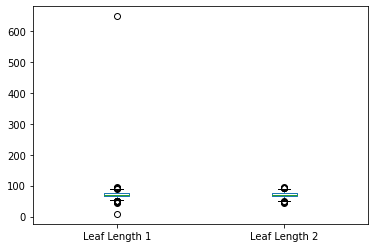

In [28]:
data.iloc[:, [3,5]].plot(kind='box')


,Plot,Row,Ran.,Leaf Length 1,Leaf Width 1,Leaf Length 2,Leaf Width 2,Ear Height 1,Flag Leaf Height 1,Plant Height 1,Ear Height 2,Flag Leaf Height 2,Plant Height 2,Yang Field Notes,Inbred or Hybrid?,Data missing?
1,1002,2,1,64.0,7.5,63.2,7.7,60.0,151.0,192.0,72.0,162.0,205.0,NaN,Inbred,NaN


In [21]:
data.rename(columns={'Plot ID' : 'PLOT ID'}, inplace= True)

In [22]:
genolabs = pd.read_csv('Raw_spectrum_merged')

In [23]:
genolabs.columns[3:17]

Index(['Unnamed: 0.1.1.1', 'PLOT ID', 'rows', 'ranges', 'Block', 'Rep',
       'Group', 'Trt', 'year', 'genotype', 'note', 'Calibration', 'ASD',
       '350'],
      dtype='object')

In [24]:
genolabs = genolabs.loc[:, ['PLOT ID', 'rows', 'ranges', 'Block', 'Rep', 'Group', 'Trt', 'year',
       'genotype', 'note', 'Calibration', 'ASD']]

In [25]:
merged1 = pd.merge(genolabs, data , how= 'right')

In [26]:
leaf_length = merged1[['Leaf Length 1', 'Leaf Length 2']].mean(axis=1)

In [27]:
leaf_width = merged1[['Leaf Width 1', 'Leaf Width 2']].mean(axis=1)

In [28]:
ear_height = merged1[['Ear Height 1', 'Ear Height 2']].mean(axis=1)

In [29]:
flag_leaf = merged1[['Flag Leaf Height 1', 'Flag Leaf Height 2']].mean(axis=1)

In [30]:
plant_height = merged1[['Plant Height 1', 'Plant Height 2']].mean(axis=1)

In [31]:
merged1.insert(12 , 'plant_height', plant_height)

ValueError: cannot insert plant_height, already exists

In [ ]:
merged1.insert(12 , 'flag_leaf', flag_leaf)

In [ ]:
merged1.insert(12 , 'ear_height', ear_height)

In [ ]:
merged1.insert(12 , 'leaf_width', leaf_width)

In [ ]:
merged1.insert(12 , 'leaf_length', leaf_length)

In [ ]:
merged1.to_csv('BGEM_extra_phenotypes.csv')

#  # insert GWAS ids for BLUPs

In [16]:
import pandas as pd
ids = pd.read_csv('BGEM_WGS_Labels.csv')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns={'Genotype' : 'genotype'}, inplace=True)

In [17]:
pheno_blups = pd.read_csv('extra_pheno_blups.csv')

In [18]:
pheno_blups = pheno_blups.loc[pheno_blups['Rep'] == 1 , :]

In [33]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')

In [34]:
ids = ids.loc[: , ['UID', 'Genotype']]

In [35]:
ids.rename(columns={'Genotype' : 'genotype'}, inplace=True)

In [22]:
merged2 = pd.merge(ids, pheno_blups, how = 'left')

In [23]:
merged2

,UID,genotype,PLOT.ID,rows,ranges,Block,Rep,Group,Trt,year,note,Calibration,leaf_length,leaf_width,ear_height,flag_leaf,plant_height
0,B001,BGEM-0001-N,1313.0,13.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,60.077876,73.281440,132.820506,174.322272
1,B001,BGEM-0001-N,2338.0,38.0,7.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,83.800672,51.370672,66.604463,123.454723,173.513956
2,B002,BGEM-0002-N,1314.0,14.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,58.580568,74.728907,129.456127,178.430644
3,B002,BGEM-0002-N,2339.0,39.0,7.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,NaN,83.112498,50.795274,65.266893,123.443043,163.091680
4,B003,BGEM-0003-N,1111.0,11.0,3.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_late,0.0,97.194627,59.251744,85.130661,135.482052,192.986909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,B313,BGEM-0251-S,2336.0,36.0,7.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,87.614947,49.949595,72.792136,126.968735,171.038818
613,B314,BGEM-0189-S,1265.0,15.0,6.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,60.275787,84.363267,136.657280,192.709431
614,B314,BGEM-0189-S,2290.0,40.0,6.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,91.296166,51.459817,72.242121,128.704977,168.357419
615,B315,BGEM-0249-N,1189.0,39.0,4.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Short_late,0.0,97.194627,59.092554,73.281440,124.098469,166.486353


In [26]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')

In [27]:
GWAS_labels.columns

Index(['UID                     '], dtype='object')

In [28]:
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [29]:
GWAS_labels.columns

Index(['UID'], dtype='object')

In [27]:
merged_LN = merged2.loc[merged2['Trt']== 'LN' , :]
merged_HN = merged2.loc[merged2['Trt']== 'HN' , :]

In [28]:
merged_HN2= pd.merge(GWAS_labels, merged_HN, how='left')
merged_LN2= pd.merge(GWAS_labels, merged_LN, how='left')

In [29]:
merged_HN2.loc[: , ['UID', 'leaf_length', 'leaf_width', 'ear_height', 'flag_leaf', 'plant_height']].to_csv('pheno_extra_HN2.csv', index= False)

In [30]:
merged_LN2.loc[: , ['UID', 'leaf_length', 'leaf_width', 'ear_height', 'flag_leaf', 'plant_height']].to_csv('pheno_extra_LN2.csv', index=False)

In [31]:
merged_last = pd.concat([merged_HN2, merged_LN2], axis= 0)

In [32]:
merged_last

,UID,genotype,PLOT.ID,rows,ranges,Block,Rep,Group,Trt,year,note,Calibration,leaf_length,leaf_width,ear_height,flag_leaf,plant_height
0,B001,BGEM-0001-N,1313.0,13.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,60.077876,73.281440,132.820506,174.322272
1,B002,BGEM-0002-N,1314.0,14.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,58.580568,74.728907,129.456127,178.430644
2,B003,BGEM-0003-N,1111.0,11.0,3.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_late,0.0,97.194627,59.251744,85.130661,135.482052,192.986909
3,B004,BGEM-0004-N,1298.0,48.0,6.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Short_late,0.0,97.194627,59.558131,79.262723,131.034620,180.694354
4,B005,BGEM-0005-N,1321.0,21.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,97.194627,59.783126,78.534074,121.655837,184.351117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,B311,BGEM-0181-N,2168.0,18.0,4.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Short_late,0.0,84.273760,50.788607,69.354540,117.149558,157.013039
218,B312,BGEM-0121-N,2177.0,27.0,4.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_late,0.0,97.209771,53.310887,81.258444,136.347051,186.095905
219,B313,BGEM-0251-S,2336.0,36.0,7.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,87.614947,49.949595,72.792136,126.968735,171.038818
220,B314,BGEM-0189-S,2290.0,40.0,6.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,91.296166,51.459817,72.242121,128.704977,168.357419


In [33]:
merged_last.to_csv('BGEM_extra_pheno_for_GWAS.csv')

In [34]:
list1= GWAS_labels['UID'].tolist()

In [35]:
list2 = merged3.loc[merged3['Trt'] == 'LN', 'UID'].tolist()

NameError: name 'merged3' is not defined

In [ ]:
def uncommon_items(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    if(set1 ^ set2):
        print('Uncommon elements: ' + str(set1 ^ set2))
    else:
        print('No Uncommon elements')

uncommon_items(list1, list2)

In [ ]:
    set1 = set(list1)
    set2 = set(list2)
(set1 ^ set2)

# Insert GWAS Ids for extra Pheno Blues

In [1]:
import pandas as pd
ids = pd.read_csv('BGEM_WGS_Labels.csv')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns={'Genotype' : 'genotype'}, inplace=True)

In [2]:
pheno_blues = pd.read_csv('extra_pheno_blues.csv')

In [40]:
pheno_HN = pheno_blues.loc[pheno_blues['Trt'] == 'HN' , :]
pheno_LN = pheno_blues.loc[pheno_blues['Trt'] ==  'LN', :]

In [41]:
merged_HN = pd.merge(ids, pheno_HN, how = 'left')
merged_LN = pd.merge(ids, pheno_LN, how = 'left')

In [43]:
pheno_HN2= pd.merge(GWAS_labels, merged_HN, how='left')
pheno_LN2= pd.merge(GWAS_labels, merged_LN, how='left')

In [47]:
merged_last = pd.concat([pheno_HN2, pheno_LN2], axis= 0)

,UID,genotype,PLOT.ID,rows,ranges,Block,Rep,Group,Trt,year,note,Calibration,ASD,leaf_length,leaf_width,ear_height,flag_leaf,plant_height
0,B001,BGEM-0001-N,1313.0,13.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,2.0,95.795066,65.046189,71.261610,138.425,173.25
1,B002,BGEM-0002-N,1314.0,14.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,1.0,88.300982,55.441124,74.071061,131.125,179.75
2,B003,BGEM-0003-N,1111.0,11.0,3.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_late,0.0,1.0,104.981899,59.811058,90.705512,144.200,201.25
3,B004,BGEM-0004-N,1298.0,48.0,6.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Short_late,0.0,2.0,91.175982,61.741124,81.071061,134.550,183.00
4,B005,BGEM-0005-N,1321.0,21.0,7.0,1.0,1.0,Inbred,HN,2022.0,BGEM_Tall_early,0.0,1.0,101.550982,63.191124,79.946061,114.200,188.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,B311,BGEM-0181-N,2168.0,18.0,4.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Short_late,0.0,2.0,81.995739,50.025000,69.625000,116.875,156.50
218,B312,BGEM-0121-N,2177.0,27.0,4.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_late,0.0,2.0,103.870739,62.050000,84.775000,140.825,191.75
219,B313,BGEM-0251-S,2336.0,36.0,7.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,2.0,87.645739,46.025000,74.000000,129.125,173.50
220,B314,BGEM-0189-S,2290.0,40.0,6.0,2.0,1.0,Inbred,LN,2022.0,BGEM_Tall_early,0.0,2.0,93.913626,53.225000,73.300000,131.500,170.25
